In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import datetime

# Load data from CSV
data = pd.read_csv("filled_data.csv",parse_dates=['Date'])


2024-03-21 08:24:33.938974: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 08:24:33.942034: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-21 08:24:33.977811: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


2024-03-21 08:24:35.063108: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# pip install pandas numpy tensorflow keras scikit-learn


In [3]:
data["Date"]=pd.to_datetime(data['Date'],dayfirst=True)

In [4]:
train=data[data['Date']<'2019-01-01']
test=data[data['Date']>='2019-01-01']

In [5]:
train.shape

(5479, 9)

In [6]:
test.shape

(365, 9)

In [7]:
features = [
    "Modal Price (Rs./Quintal)",
    "Rel Humidity at 2 Meters (%) ",
    "Precipitation Corrected (mm/day) ",
    "Surface Soil Wetness",
    "Root Zone Soil Wetness",
    "Temperature at 2 Meters",
]
target = "Modal Price (Rs./Quintal)"

In [8]:
# python -m pip install flask

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
target_scaler=MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(train[features])
y_train=target_scaler.fit_transform(np.array(train[target]).reshape(-1, 1))

In [10]:
X_test=scaler.transform(test[features])
y_test=target_scaler.transform(np.array(test[target]).reshape(-1,1))

In [11]:
X_test.shape

(365, 6)

In [12]:
import pandas as pd
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back - 1):
        X.append(data[i : (i + look_back), :])
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)


look_back = 60  # Adjust this based on your data and experiment

X_train_seq, y_train_seq = create_sequences(X_train, look_back)
X_test_seq, y_test_seq = create_sequences(X_test, look_back)

# Define and train the LSTM model
model = Sequential()
model.add(
    LSTM(50, return_sequences=True, input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))
)  # Adjust units (50) based on your data and experiment
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.fit(X_train_seq, y_train_seq, epochs=20, batch_size=32, validation_data=(X_test_seq, y_test_seq))

# Make predictions on test data
y_pred = model.predict(X_test_seq)



Epoch 1/20


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5:49 2s/step - loss: 0.1321

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.1085

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0923

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0812

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0727

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0663

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0610

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0566

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0528

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0496

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0468

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0444

 37/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 0.0422

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0403

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0385

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0369

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0355

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0342

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0330

 57/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0322

 60/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0312

 63/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0302

 65/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0296

 68/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0287

 71/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0279

 74/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0271

 77/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0264

 80/170 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0257

 83/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0251

 86/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0245

 89/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0239

 92/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0234

 95/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0229

 98/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0224

101/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0219

104/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0215

107/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0211

110/170 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0207

113/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0203

116/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0199

119/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0195

122/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0192

125/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0189

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0186

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0183

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0180

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0177

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0174

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0172

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0169

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0167

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0164

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0162

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0160

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0158

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0156

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0154

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0152

170/170 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - loss: 0.0151 - val_loss: 0.0015


Epoch 2/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 0.0013

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.5610e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 7.4444e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.9679e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.5924e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.3454e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.1787e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 6.0563e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.9528e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8656e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.8199e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7946e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7755e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7518e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7380e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7239e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7201e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7232e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7260e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7272e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7277e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7330e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7399e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7431e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7423e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7396e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.7348e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7298e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7256e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7205e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7191e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7176e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7194e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7229e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7277e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7304e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7345e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7412e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7469e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7526e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7580e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 5.7624e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7660e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7684e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7696e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7698e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7703e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7719e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7731e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7739e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7745e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7751e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7752e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7748e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7746e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7736e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.7726e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 5.7716e-04 - val_loss: 0.0015


Epoch 3/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.3633e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1994e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.6669e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8544e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8863e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8981e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9399e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9980e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0572e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1092e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1615e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2044e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2374e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2761e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3277e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3706e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4022e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4283e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4524e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4717e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4911e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5096e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5265e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5459e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5649e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5792e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5947e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6087e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6220e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6337e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6462e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6620e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6774e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6904e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7009e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7088e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7182e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7274e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7355e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7431e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7518e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7609e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7693e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7771e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7834e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7887e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7932e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7970e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.7998e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8017e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8032e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8041e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8046e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8045e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8045e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8042e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.8043e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 4.8042e-04 - val_loss: 0.0011


Epoch 4/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 5.1528e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.2639e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.7277e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8268e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8302e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8954e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8976e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8787e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8923e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8885e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8659e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8528e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8360e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.8144e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7951e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7749e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7592e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7589e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7564e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7544e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7487e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7408e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7354e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7293e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7223e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7140e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7068e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6993e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6904e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6811e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6717e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6625e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6523e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6407e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6283e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6166e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6053e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5941e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5843e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5744e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5636e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.5535e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5458e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5388e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5334e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5287e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5235e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5180e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5132e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5083e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5031e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4994e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4961e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4923e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4884e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4843e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4803e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.4776e-04 - val_loss: 8.0999e-04


Epoch 5/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 9.4330e-05

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 1.4576e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6811e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1416e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5530e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8219e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0168e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1374e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2120e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2692e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3259e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3778e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4191e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4630e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4969e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5235e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5487e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5696e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5894e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6077e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6213e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6305e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6368e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6414e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6439e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6443e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6446e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6435e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6414e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6396e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6387e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6389e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6388e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6380e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6389e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6416e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6451e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6513e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6605e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6695e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6783e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.6882e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.6982e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7073e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7159e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7242e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7322e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7393e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7458e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7512e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7556e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7599e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7635e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7671e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7712e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7750e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7783e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 3.7802e-04 - val_loss: 6.1593e-04


Epoch 6/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 6.7471e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6952e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0183e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1987e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.4632e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.6438e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.7648e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8368e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8615e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8532e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.8274e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7938e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7553e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.7070e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6578e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.6087e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5626e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.5155e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4689e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.4261e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3860e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3466e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.3079e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2694e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.2319e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1967e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1624e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1301e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.1016e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0757e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0513e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0292e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0108e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9931e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9769e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9623e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9479e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9342e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9207e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9078e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8956e-04

123/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8876e-04

125/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8799e-04

128/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8694e-04

131/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8617e-04

134/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8549e-04

137/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8490e-04

140/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8435e-04

143/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8386e-04

146/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8338e-04

149/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8295e-04

152/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8249e-04

155/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8207e-04

158/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8165e-04

161/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8129e-04

164/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8101e-04

167/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8077e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8055e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.8047e-04 - val_loss: 0.0016


Epoch 7/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 6.1580e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.6247e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.5639e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4765e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4486e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4267e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4361e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4457e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.4148e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.3656e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 5.3223e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2887e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2665e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2460e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2319e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2258e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.2121e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1916e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1659e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1397e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.1112e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0832e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0547e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0282e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 5.0027e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9792e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.9564e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.9338e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.9108e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8907e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8696e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8479e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8254e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.8026e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7790e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7552e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7325e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.7119e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6972e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6836e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6702e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.6566e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6427e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6288e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6148e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.6009e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5872e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5736e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5602e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5465e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5329e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5194e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.5059e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4924e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4790e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4658e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 4.4538e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 4.4460e-04 - val_loss: 4.9157e-04


Epoch 8/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 1.9744e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5475e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6925e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7776e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8818e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9792e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0260e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0596e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0789e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0937e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.0929e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0823e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1028e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1262e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1470e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1675e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1895e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2130e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2360e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2549e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2718e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.2860e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3010e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3156e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3292e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3387e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3459e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3507e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3553e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3601e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3635e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3659e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3680e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3701e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3717e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3727e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3748e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3758e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3772e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3786e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3797e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3801e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3801e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3799e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3799e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3797e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3798e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3797e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3795e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3793e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3788e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3781e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3773e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3769e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3768e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3776e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3795e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 3.3810e-04 - val_loss: 4.7497e-04


Epoch 9/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.0139e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - loss: 3.2863e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4969e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6603e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7592e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8813e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9906e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0746e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1210e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1537e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.1730e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1786e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1722e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1711e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1706e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1672e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1652e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1613e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1512e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1385e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1252e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.1128e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0989e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0832e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0652e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0511e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 4.0382e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0251e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 4.0108e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9964e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9818e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9677e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9544e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9415e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9291e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9171e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.9054e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8945e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8843e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8735e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8631e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.8526e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8420e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8321e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8232e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8148e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8077e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.8011e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7954e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7900e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7842e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7781e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7720e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7660e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7604e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7547e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.7487e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 3.7446e-04 - val_loss: 6.2457e-04


Epoch 10/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 3.3597e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.9685e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.8033e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.7023e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6327e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5914e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5422e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4949e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4600e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4345e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4137e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3949e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3819e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3730e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3629e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3625e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3624e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3644e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3726e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3843e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3963e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4093e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4229e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4390e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4536e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4655e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4763e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4871e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4973e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5072e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5164e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5254e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5335e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5420e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5501e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5583e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5661e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5735e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5809e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5884e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5960e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.6035e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6108e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6176e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6237e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6305e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6377e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6445e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6513e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6588e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6671e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6754e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6844e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.6946e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7049e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7153e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7255e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.7322e-04 - val_loss: 0.0012


Epoch 11/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 3.5903e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0966e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7815e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6052e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5123e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4312e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3590e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.3039e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.2501e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1945e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.1435e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.1011e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0637e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0325e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.0051e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9809e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9628e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9463e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9316e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9196e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.9072e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8958e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8847e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8737e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8650e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8574e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.8507e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8444e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8384e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8329e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8281e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8235e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8204e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8166e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8129e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8091e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8058e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.8023e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7988e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7955e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7927e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.7906e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7891e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7879e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7865e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7849e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7830e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7810e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7793e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7779e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7772e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7769e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7772e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7778e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7789e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7803e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.7818e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.7830e-04 - val_loss: 9.3672e-04


Epoch 12/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 4.7418e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.3845e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 4.0715e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.9077e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8581e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.8255e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7774e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7363e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.7005e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6779e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.6509e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6166e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5818e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5463e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5151e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4845e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4563e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4318e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.4132e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3968e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3832e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3701e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3573e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3464e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3405e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3348e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.3276e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3196e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3109e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3016e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2950e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2895e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2837e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2781e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2724e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2658e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2583e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2502e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2417e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2343e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2275e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.2211e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2154e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2099e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2039e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1980e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1926e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1877e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1828e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1779e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1729e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1679e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1626e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1572e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1519e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1469e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.1423e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 3.1395e-04 - val_loss: 7.9302e-04


Epoch 13/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 3.0161e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5880e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5347e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4666e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4198e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4208e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4564e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4776e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.4941e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5288e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 3.5655e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5965e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6222e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6455e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6592e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6671e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6693e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6666e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6622e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6528e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6407e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6254e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.6083e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5910e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5733e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5569e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 3.5398e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5230e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.5066e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4913e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4764e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4616e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4474e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4348e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4227e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.4113e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3997e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3877e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3756e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3634e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3512e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 3.3391e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3269e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3148e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.3032e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2918e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2808e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2706e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2624e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2548e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2476e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2407e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2340e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2275e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2212e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2150e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 3.2087e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 3.2045e-04 - val_loss: 3.9295e-04


Epoch 14/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 9.8496e-05

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1467e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1279e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1169e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1413e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1621e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2066e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2501e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2845e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2992e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3095e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3181e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3260e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3414e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3601e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3788e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3930e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4077e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4223e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4368e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4475e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4556e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4622e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4683e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4749e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4817e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.4873e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4909e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4935e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4955e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4976e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4985e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4989e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4988e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4983e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4973e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4971e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4974e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4980e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4984e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4986e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4992e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5000e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5006e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5009e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5012e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5016e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5020e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5020e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5016e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5010e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.5003e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4995e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4985e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4975e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4970e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4966e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.4964e-04 - val_loss: 4.1365e-04


Epoch 15/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 2.3579e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 2.0328e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 1.9754e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9889e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9918e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0795e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.1639e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2221e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2587e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2996e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3248e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3420e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3589e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3684e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3735e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3749e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3765e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3762e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3757e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3732e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3701e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3660e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3636e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3656e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3710e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3761e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.3805e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.3896e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4002e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4115e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4217e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4312e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4390e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4454e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4510e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4558e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4600e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4639e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4676e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4710e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4742e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4768e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4787e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4801e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4809e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4816e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4824e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4833e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4853e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4870e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4882e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4892e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4903e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4912e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4922e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4929e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4935e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.4937e-04 - val_loss: 3.7287e-04


Epoch 16/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.1704e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9652e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9088e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9083e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8935e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9140e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9365e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9408e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9519e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9551e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9504e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9436e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9367e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9332e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9345e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9402e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9466e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9549e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9616e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9670e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9737e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9805e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9845e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9888e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9942e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9994e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0057e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0135e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0225e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0314e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0401e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0486e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0574e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0665e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0751e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0838e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0924e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1004e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1074e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1145e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1216e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1290e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1361e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1427e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1486e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1539e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1590e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1642e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1689e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1732e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1772e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1807e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1840e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1879e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1919e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1955e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1988e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2009e-04 - val_loss: 4.7013e-04


Epoch 17/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.4917e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.2922e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3402e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.3949e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4123e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.4990e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.5587e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6233e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6533e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6657e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.6645e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6628e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6610e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6590e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6540e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6510e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6454e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6371e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6287e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6207e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6125e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.6035e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5948e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5864e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5782e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.5698e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5607e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5509e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5406e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5299e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5189e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.5081e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4979e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4881e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4791e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4710e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4631e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4559e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4492e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4436e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4389e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.4344e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4303e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4261e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4221e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4179e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4135e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4088e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.4041e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3992e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3944e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3896e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3850e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3803e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3758e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3713e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.3670e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.3647e-04 - val_loss: 3.3998e-04


Epoch 18/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 8.8139e-05

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.4494e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.5222e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.5651e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.5707e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6117e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6492e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.6890e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7436e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.7760e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8046e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8306e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8511e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8700e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8889e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9056e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9182e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9306e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9420e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9519e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9635e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9741e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9869e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0010e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0141e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0281e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 2.0428e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0576e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0715e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0831e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0932e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1018e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1094e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1164e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1227e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1291e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1361e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1425e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1488e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1547e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1597e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1646e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1695e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1739e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1776e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1809e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1842e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1870e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1893e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1912e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1927e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1940e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1954e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1966e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1976e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1986e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1995e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.2000e-04 - val_loss: 3.4380e-04


Epoch 19/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 35ms/step - loss: 1.9747e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0154e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0163e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9303e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8748e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8671e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8692e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8735e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8845e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.8993e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9094e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9094e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9063e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9040e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9083e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9167e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9235e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9303e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9361e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9422e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9495e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9561e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9625e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9668e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9697e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9739e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9805e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9877e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9960e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0042e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0121e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0193e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0262e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0328e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0383e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0429e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0475e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0524e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0570e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0611e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0646e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0686e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0722e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0757e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0787e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0814e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0839e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0865e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0889e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0914e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0939e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0966e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.0989e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1009e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1027e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1043e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1058e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - loss: 2.1069e-04 - val_loss: 3.1513e-04


Epoch 20/20


  1/170 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - loss: 2.4427e-04

  4/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9442e-04

  7/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9966e-04

 10/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 2.0170e-04

 13/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9893e-04

 16/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9559e-04

 19/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9485e-04

 22/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9453e-04

 25/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9450e-04

 28/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9418e-04

 31/170 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 1.9355e-04

 34/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9251e-04

 37/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9130e-04

 40/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9022e-04

 43/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.8962e-04

 46/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9053e-04

 49/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9120e-04

 52/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9186e-04

 55/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9250e-04

 58/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9302e-04

 61/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9336e-04

 64/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9371e-04

 67/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9399e-04

 70/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9475e-04

 73/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9565e-04

 76/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9672e-04

 79/170 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 1.9783e-04

 82/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.9894e-04

 85/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0016e-04

 88/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0140e-04

 91/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0271e-04

 94/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0430e-04

 97/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0590e-04

100/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0736e-04

103/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.0873e-04

106/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1000e-04

109/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1121e-04

112/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1235e-04

115/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1336e-04

118/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1431e-04

121/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1524e-04

124/170 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 2.1605e-04

127/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1680e-04

130/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1748e-04

133/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1807e-04

136/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1860e-04

139/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1907e-04

142/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1950e-04

145/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.1988e-04

148/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2021e-04

151/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2048e-04

154/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2072e-04

157/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2093e-04

160/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2111e-04

163/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2128e-04

166/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2146e-04

169/170 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 2.2160e-04

170/170 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - loss: 2.2168e-04 - val_loss: 3.3560e-04


 1/10 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step

 9/10 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [13]:
len(X_test)

365

In [14]:
y_pred = y_pred.reshape(-1)

In [15]:
y_pred_scaled = target_scaler.inverse_transform(y_pred.reshape(-1, 1))
y_test_seq = y_test_seq.reshape(-1)
y_test_scaled = target_scaler.inverse_transform(y_test_seq.reshape(-1, 1))


In [16]:
len(y_pred_scaled)

304

In [17]:
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test_scaled, y_pred_scaled, squared=False)
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Root Mean Squared Error (RMSE): 78.67


/opt/hostedtoolcache/Python/3.12.2/x64/lib/python3.12/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [18]:
y_pred_scaled[0]

array([3503.2207], dtype=float32)

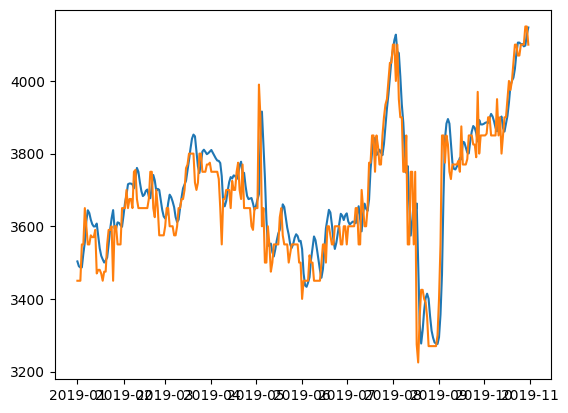

In [19]:
import matplotlib.pyplot as plt
plt.plot(test['Date'][0:304],y_pred_scaled.reshape(-1))
plt.plot(test['Date'][0:304],y_test_scaled.reshape(-1))

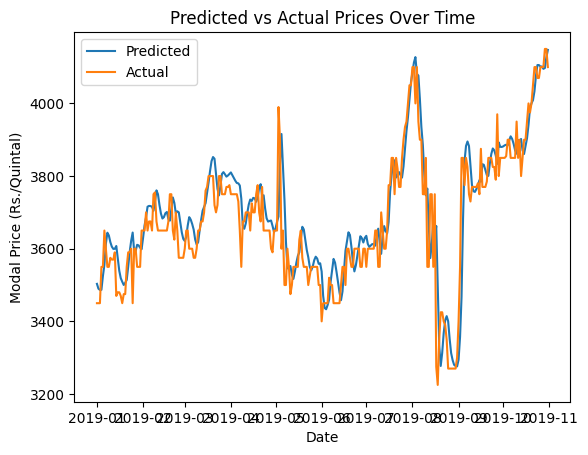

In [20]:

# Define the date range for plotting
date_range = test['Date'].iloc[:len(y_pred_scaled)]

# Plot the predictions against the actual values over time
plt.plot(date_range, y_pred_scaled, label='Predicted')
plt.plot(date_range, y_test_scaled, label='Actual')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time')
plt.legend()

# Show plot
plt.show()

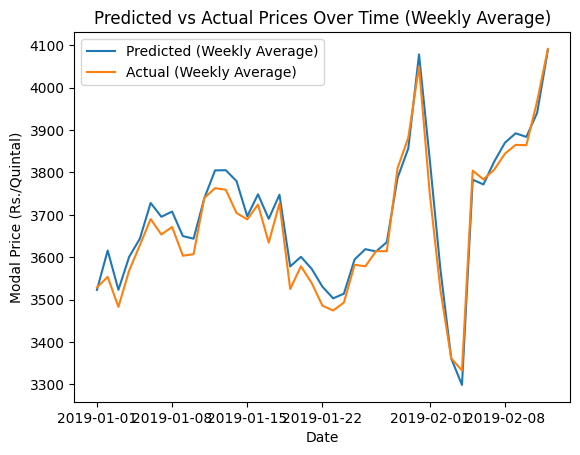

In [21]:
# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)


# Plot the weekly average predictions against the actual values
plt.plot(test['Date'][:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test['Date'][:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()
plt.savefig("static/my_plot1.png")
# Show plot
plt.show()

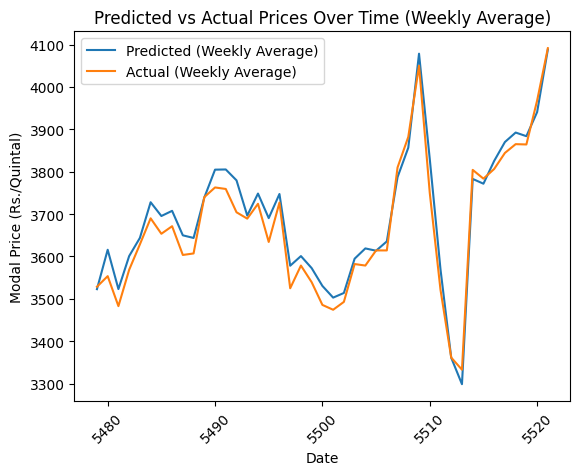

In [22]:

# Define the number of days in a week
days_in_week = 7
num_weeks = len(y_pred_scaled) // days_in_week

# Reshape the predictions and true values to weekly data
y_pred_weekly = y_pred_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)
y_test_weekly = y_test_scaled[:num_weeks * days_in_week].reshape(-1, days_in_week).mean(axis=1)

# Plot the weekly average predictions against the actual values
plt.plot(test.index[:len(y_pred_weekly)], y_pred_weekly, label='Predicted (Weekly Average)')
plt.plot(test.index[:len(y_test_weekly)], y_test_weekly, label='Actual (Weekly Average)')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Predicted vs Actual Prices Over Time (Weekly Average)')
plt.legend()

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.savefig('static/my_plot.png')
# Show plot
plt.show()

In [23]:
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.layouts import row, column
from bokeh.models.widgets import TextInput
from bokeh.models import CustomJS

# Define Bokeh plots
plot1 = figure(title="Predicted vs Actual Prices Over Time",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

plot2 = figure(title="Predicted vs Actual Prices Over Time (Weekly Average)",
               x_axis_label='Date',
               y_axis_label='Modal Price (Rs./Quintal)',
               x_axis_type='datetime')

# Add data to plots
source1 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_scaled)],
                                     predicted=y_pred_scaled.reshape(-1),
                                     actual=y_test_scaled.reshape(-1)))
plot1.line(x='date', y='predicted', source=source1, legend_label='Predicted', color='blue')
plot1.line(x='date', y='actual', source=source1, legend_label='Actual', color='orange')

source2 = ColumnDataSource(data=dict(date=test['Date'][:len(y_pred_weekly)],
                                     predicted_weekly=y_pred_weekly,
                                     actual_weekly=y_test_weekly))
plot2.line(x='date', y='predicted_weekly', source=source2, legend_label='Predicted (Weekly Average)', color='blue')
plot2.line(x='date', y='actual_weekly', source=source2, legend_label='Actual (Weekly Average)', color='orange')

# Add hover tooltips
hover_tool1 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted"), ("Actual", "@actual")],
                        formatters={"@date": "datetime"})
plot1.add_tools(hover_tool1)

hover_tool2 = HoverTool(tooltips=[("Date", "@date{%F}"), ("Predicted", "@predicted_weekly"), ("Actual", "@actual_weekly")],
                        formatters={"@date": "datetime"})
plot2.add_tools(hover_tool2)

# Define dashboard layout
dashboard_layout = column(plot1, plot2)

# Save and show the dashboard
output_file("index.html")
show(dashboard_layout)
